reference : https://web.mst.edu/~bohner/fim-10/fim-chap4.pdf

**Vasichek Model**


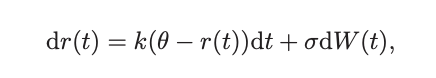


K     = Speed of mean reversion 

Theta = Mean rate

Sigma = Volatility

dW(t) = Stochastic Factor, we are using normal distribution with a mean of 0 and standard deviation of sqrt(dt)


**Trial with one simulation**

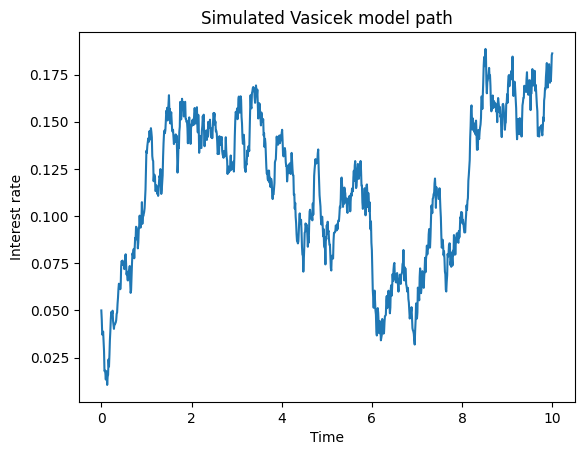

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Vasicek model parameters
r0 = 0.05     # initial interest rate
theta = 0.1   # long-term mean rate
k = 0.3   # speed of mean reversion
sigma = 0.05  # volatility of the interest rate

# simulation parameters
T = 10        # time horizon
N = 1000     # number of time steps
dt = T / N   # time step size

# Euler-Maruyama method for simulating the Vasicek model
r = np.zeros(N+1)
r[0] = r0
for i in range(N):
    dW = np.random.normal(0, np.sqrt(dt))  # Brownian motion increment
    dr = k * (theta - r[i]) * dt + sigma * dW  # Vasicek model increment
    r[i+1] = r[i] + dr

# plot the simulated path of the Vasicek model
plt.plot(np.linspace(0, T, N+1), r)
plt.xlabel('Time')
plt.ylabel('Interest rate')
plt.title('Simulated Vasicek model path')
plt.show()


**Vasicek Model with Monte Carlo simulation**

> Time duration: 10 years

> Steps: 1000

> Simulation: 50



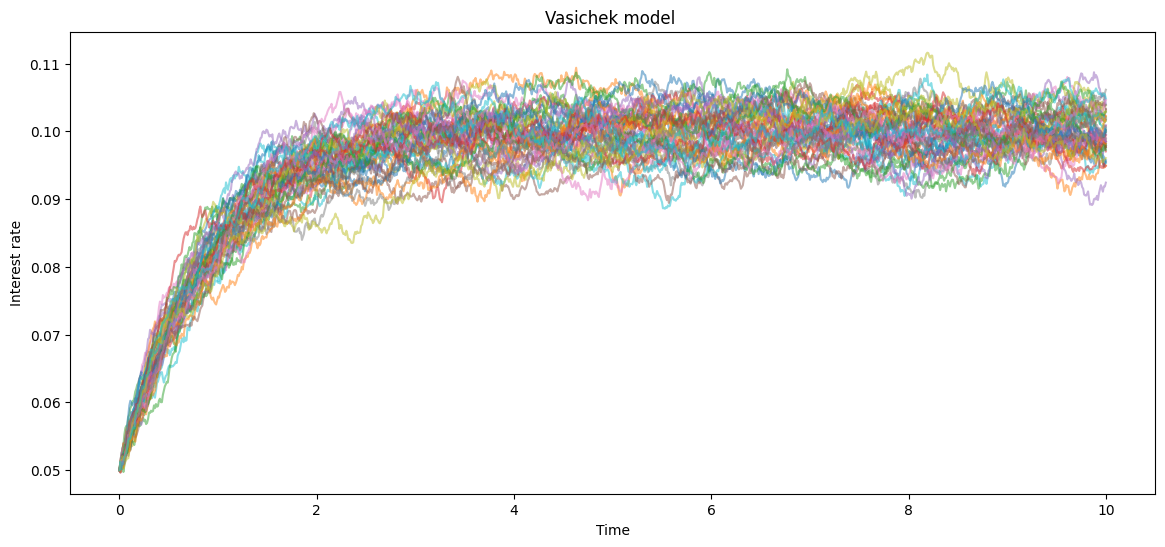

In [ ]:

def vasichek(r0, theta, k, sigma, T, N, num_sims):
    """
    Returns:
        A NumPy array of size (N+1, num_sims) containing simulated paths of the interest rate.
    """
    dt = T / N
    r = np.zeros((N+1, num_sims))
    r[0] = r0
    for i in range(N):
        dW = np.random.normal(0, np.sqrt(dt), size=num_sims)
        dr = k * (theta - r[i]) * dt + sigma * np.sqrt(dt) * dW
        r[i+1] = r[i] + dr
        #print(r[i+1])
        #print(r[i])
    #print(dr)
    #ZCB(r, k, theta, sigma, st, bT )
    return r

# Vasicek model parameters
r0 = 0.05     # initial interest rate
theta = 0.1   # long-term mean rate
k = 1.1  # speed of mean reversion
sigma = 0.05  # volatility of the interest rate

# simulation parameters
T = 10         # time period
N = 1000         # number of time steps
num_sims = 50 # number of simulations to perform

# simulate paths of the Vasicek model using Monte Carlo simulations
r = vasichek(r0, theta, k, sigma, T, N, num_sims)

# plot the simulated paths

fig = plt.figure(figsize=(14, 6))
t = np.linspace(0, T, N+1)
for i in range(num_sims):
    plt.plot(t, r[:, i], alpha=0.5)
plt.xlabel('Time')
plt.ylabel('Interest rate')
plt.title('Vasichek model ')
plt.show()



**Vasicek Model with Monte Carlo simulation and using ZCB method to get the yield curve**




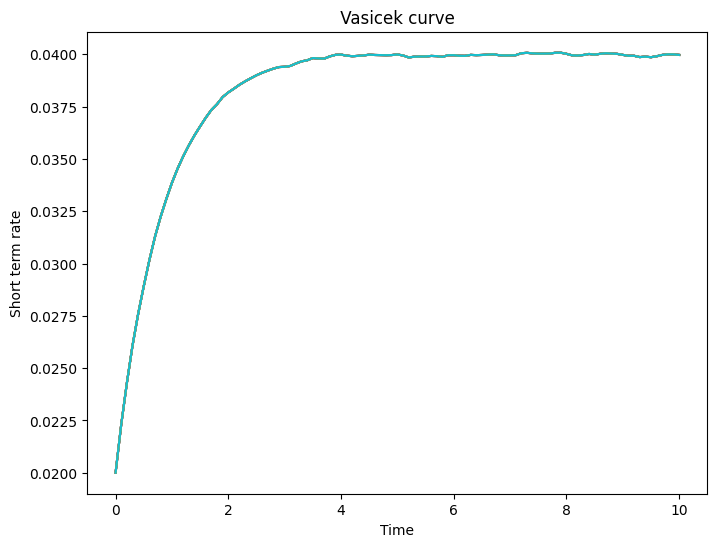

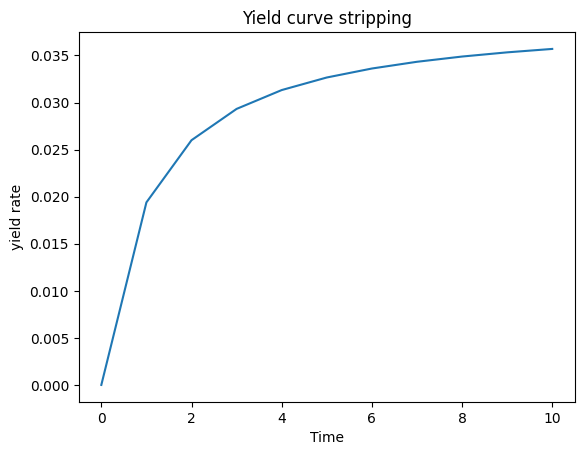

In [ ]:
#Trial
def vasichek(r0, theta, k, sigma, T, N, num_sims):
    """
    Returns:
        A NumPy array of size (N+1, num_sims) containing simulated paths of the interest rate.
    """
    dt = T / N
    r = np.zeros((N+1, num_sims))
    r[0] = r0
    for i in range(N):
        dW = np.random.normal(0, np.sqrt(dt), size=num_sims)
        dr = k * (theta - r[i]) * dt + sigma * np.sqrt(dt) * dW
        r[i+1] = r[i] + dr
        #print(r[i+1])
        #print(r[i])
    #print(dr)
    R = np.mean(r,axis =1)
    P_1 = np.zeros((N+1,10+1))
    rates = np.zeros(10+1)
    '''
    for j in range(num_bond):
      for i in range(N+1):
        st = dt * i
        P_1[i] = ZCB(R[i], k, theta, sigma, st, st+j ) #st = current step time, bT = st + D maturity year or duration
    '''
    
    for j in range(num_bond+1):
      for i in range(N+1):
        st = dt * i
        P_1[i][j] = ZCB(R[i], k, theta, sigma, st, st+j )  #st = current step time, bT = st + D maturity year or duration
      P = np.mean(P_1,axis =0)
      rates[j] = -np.log(P[:][j])/(1+j)
        #print(P_1[i])
    return r,R ,P_1, rates
    
    #return r,R 

def ZCB(r, k, theta, sigma, st, bT ):
  BtT = (k **-1) * (1 - np.exp(-k * (bT - st)))
  AtT = np.exp((theta - (sigma ** 2) / (2 * (k ** 2))) * (BtT - bT + st) - (sigma ** 2) * (BtT ** 2) / (4 * (k ** 2)))
  VasicekBond = AtT * np.exp(-BtT * r)
  return VasicekBond
'''
def YieldCurveStripping(rates):
  P = 

'''


# Vasicek model parameters
r0 = 0.02     # initial interest rate
theta = 0.04  # long-term mean rate
k = 1.1  # speed of mean reversion
sigma = 0.04  # volatility of the interest rate

# simulation parameters
T = 10           # time period
N = 100          # number of time steps
num_sims = 10000 # number of simulations to perform

#ZCB 
num_bond = 10

# simulate paths of the Vasicek model using Monte Carlo simulations
r,R, P_1, rates = vasichek(r0, theta, k, sigma, T, N, num_sims)
#r,R = vasichek(r0, theta, k, sigma, T, N, num_sims)


# plot the simulated paths
'''
fig = plt.figure(figsize=(14, 6))
t = np.linspace(0, T, N+1)
for i in range(num_sims):
    plt.plot(t, r[:, i], alpha=0.5)
plt.xlabel('Time')
plt.ylabel('Interest rate')
plt.title('Vasichek model ')
plt.show()
'''


#Plot for Yield curve
fig = plt.figure(figsize=(8, 6))
t = np.linspace(0, T, N+1)
'''
for i in range(num_bond):
    plt.plot(t, P_1[:, i], alpha=0.5)
'''
for i in range(num_bond):
    plt.plot(t, R)

plt.xlabel('Time')
plt.ylabel('Short term rate')
plt.title(' Vasicek curve ')
plt.show()
'''
#Plot 
for i in range(num_bond):
    plt.plot(t, P_1)

plt.xlabel('Time')
plt.ylabel('ZCB rate')
plt.title('ZCB curve ')
plt.show()

'''

#Plot 
'''
print(f'rates = {rates}')
for i in range(num_bond):
    print(f'i ={i} and yield = {rates[i]}')
    plt.plot(i, rates[i])
'''
plt.plot(rates)
plt.xlabel('Time')
plt.ylabel('yield rate')
plt.title('Yield curve stripping')
plt.show()
